<a href="https://colab.research.google.com/github/claudia-miranda/pandas_data_sorting_examples/blob/main/pandas_data_sorting_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import collections
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
face_data = ((pd.read_csv('/content/drive/MyDrive/Revolut_Task/facial_similarity.csv', skiprows=0, header=0)).sort_values(by=['created_at'])).drop_duplicates(subset=['user_id'], keep='last')
doc_data = ((pd.read_csv('/content/drive/MyDrive/Revolut_Task/doc_reports.csv', skiprows=0, header=0)).sort_values(by=['created_at'])).drop_duplicates(subset=['user_id'], keep='last')

In [ ]:
face_data_array = (face_data.sort_values(by=['created_at'])).to_numpy() # data doc 1 in numpy array without modifications
doc_data_array = (doc_data.sort_values(by=['created_at'])).to_numpy() # data doc 2 in numpy array without modifications

face_data['created_at'] = [pd.Timestamp(t) for t in face_data['created_at']]
doc_data['created_at'] = [pd.Timestamp(t) for t in doc_data['created_at']]


In [ ]:
face_result_history = face_data['result'].to_numpy()
doc_result_history = doc_data['result'].to_numpy()


In [ ]:
doc_boolean = doc_result_history == 'clear'  # boolean that displays "True" when result is "clear" in doc 1, and "False" otherwise
face_boolean = face_result_history == 'clear' # boolean that displays "True" when result is "clear" in doc 2, and "False" otherwise

result_boolean = doc_boolean & face_boolean == True  # boolean that displays "True" when result is "clear" in BOTH documents

count_clear = np.sum(result_boolean)  # counts all the "clear" results

## PASS RATE
pass_rate = count_clear / doc_result_history.shape[0]   # divided by the number of non duplicates i.e. the actual number of people that attempt, not the number of attempts (up to 2 per person)
display_pass_rate = format(pass_rate*100,'.3f')
print('The pass rate is {} %.'.format(display_pass_rate))

The pass rate is 84.860 %.


In [ ]:
fails_boolean = np.array([not elem for elem in result_boolean])
count_fails = np.sum(fails_boolean)
arg_fails = np.array(np.argwhere(fails_boolean==True), dtype=int)

print('The number of fails (only counting second attempts and hence disregarding first attempts) is {}.'.format(count_fails))

## FAIL RATE
fail_rate = count_fails / face_result_history.shape[0]
display_fail_rate = format((fail_rate)*100, '.3f')
assert abs((1-pass_rate)-fail_rate) < 10**(-8)
print('The fail rate is {} %.'.format(display_fail_rate))

## FAIL RATE OF EACH DOC
not_doc_boolean = np.array([not elem for elem in doc_boolean])
not_face_boolean = np.array([not elem for elem in face_boolean])

ov_doc_fails = not_doc_boolean[arg_fails].flatten()
ov_face_fails = not_face_boolean[arg_fails].flatten() # displays True for element where there is a 'consider'

ov_fails = (ov_doc_fails & ov_face_fails == True).flatten()  # displays True for rows where both docs are NOT clear (consider)
ov_fails_not_arg = np.argwhere(ov_fails==False).flatten() # argument where NOT both documents are NOT clear

doc_fails = ov_doc_fails[ov_fails_not_arg]
face_fails = ov_face_fails[ov_fails_not_arg]

# Percentages where either doc 1 failed or doc 2 failed

doc_perc_fails = np.sum(doc_fails) / count_fails
face_perc_fails = np.sum(face_fails) / count_fails

display_doc_perc_fails = format(doc_perc_fails*100,'.3f')
print('The  percentage of fails corresponding to doc 1 is  {} %.'.format(display_doc_perc_fails))

display_face_perc_fails = format(face_perc_fails*100,'.3f')
print('The  percentage of fails corresponding to doc 2 is {} %.'.format(display_face_perc_fails))


# Percentage where both document checks failed

ov_doc_count_fails = np.sum(ov_doc_fails)
ov_face_count_fails = np.sum(ov_face_fails)

assert count_fails == ov_doc_count_fails + ov_face_count_fails - np.sum(ov_fails)

ov_doc_perc_fails = ov_doc_count_fails / count_fails
ov_face_perc_fails = ov_face_count_fails / count_fails

overlap = abs((ov_doc_perc_fails + ov_face_perc_fails) - 1)
display_overlap_perc = format(overlap*100, '.3f')

print('The percentage of fails corresponding to both documents is {} %'.format(display_overlap_perc))

assert abs(overlap + face_perc_fails + doc_perc_fails - 1)<10**(-8)

The number of fails (only counting second attempts and hence disregarding first attempts) is 21608.
The fail rate is 15.140 %.
The  percentage of fails corresponding to doc 1 is  78.753 %.
The  percentage of fails corresponding to doc 2 is 10.524 %.
The percentage of fails corresponding to both documents is 10.723 %


In [ ]:
from datetime import date

may_date_from = pd.Timestamp('2017-05-01 00:00:00+00:00', unit='ns')
may_date_to = pd.Timestamp('2017-06-01 00:00:00+00:00', unit='ns')

june_date_from = pd.Timestamp('2017-06-01 00:00:00+00:00', unit='ns')
june_date_to = pd.Timestamp('2017-07-01 00:00:00+00:00', unit='ns')

july_date_from = pd.Timestamp('2017-07-01 00:00:00+00:00', unit='ns')
july_date_to = pd.Timestamp('2017-08-01 00:00:00+00:00', unit='ns')

august_date_from = pd.Timestamp('2017-08-01 00:00:00+00:00', unit='ns')
august_date_to = pd.Timestamp('2017-09-01 00:00:00+00:00', unit='ns')

september_date_from = pd.Timestamp('2017-09-01 00:00:00+00:00', unit='ns')
september_date_to = pd.Timestamp('2017-10-01 00:00:00+00:00', unit='ns')

october_date_from = pd.Timestamp('2017-10-01 00:00:00+00:00', unit='ns')
october_date_to = pd.Timestamp('2017-11-01 00:00:00+00:00', unit='ns')

face_may = face_data[(face_data['created_at'] > may_date_from ) & (face_data['created_at'] < may_date_to)]
doc_may = doc_data[(doc_data['created_at'] > may_date_from ) & (doc_data['created_at'] < may_date_to)]

face_june = face_data[(face_data['created_at'] > june_date_from ) & (face_data['created_at'] < june_date_to)]
doc_june = doc_data[(doc_data['created_at'] > june_date_from ) & (doc_data['created_at'] < june_date_to)]

face_july = face_data[(face_data['created_at'] > july_date_from ) & (face_data['created_at'] < july_date_to)]
doc_july = doc_data[(doc_data['created_at'] > july_date_from ) & (doc_data['created_at'] < july_date_to)]

face_august = face_data[(face_data['created_at'] > august_date_from ) & (face_data['created_at'] < august_date_to)]
doc_august = doc_data[(doc_data['created_at'] > august_date_from ) & (doc_data['created_at'] < august_date_to)]

face_september = face_data[(face_data['created_at'] > september_date_from ) & (face_data['created_at'] < september_date_to)]
doc_september = doc_data[(doc_data['created_at'] > september_date_from ) & (doc_data['created_at'] < september_date_to)]

face_october = face_data[(face_data['created_at'] > october_date_from ) & (face_data['created_at'] < october_date_to)]
doc_october = doc_data[(doc_data['created_at'] > october_date_from ) & (doc_data['created_at'] < october_date_to)]

assert face_may.shape[0] == doc_may.shape[0]

clear_may = np.sum(result_boolean[0:face_may.shape[0]])
clear_june = np.sum(result_boolean[face_may.shape[0]:(face_june.shape[0]+face_may.shape[0])])
clear_july = np.sum(result_boolean[(face_june.shape[0]+face_may.shape[0]):(face_june.shape[0]+face_may.shape[0]+face_july.shape[0])])
clear_august = np.sum(result_boolean[(face_june.shape[0]+face_may.shape[0]+face_july.shape[0]):(face_june.shape[0]+face_may.shape[0]+face_july.shape[0]+face_august.shape[0])])
clear_september = np.sum(result_boolean[(face_june.shape[0]+face_may.shape[0]+face_july.shape[0]+face_august.shape[0]):(face_june.shape[0]+face_may.shape[0]+face_july.shape[0]+face_august.shape[0]+face_september.shape[0])])
clear_october = np.sum(result_boolean[(face_june.shape[0]+face_may.shape[0]+face_july.shape[0]+face_august.shape[0]+face_september.shape[0]):(face_june.shape[0]+face_may.shape[0]+face_july.shape[0]+face_august.shape[0]+face_september.shape[0]+face_october.shape[0])])


data_by_month = {'May': [face_may, doc_may], 'June': [face_june, doc_june],
                 'July': [face_july, doc_july], 'August': [face_august, doc_august],
                 'September': [face_september, doc_september], 'October': [face_october, doc_october]}



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o


[ 1554  7145 28618 30817 30385 44205]


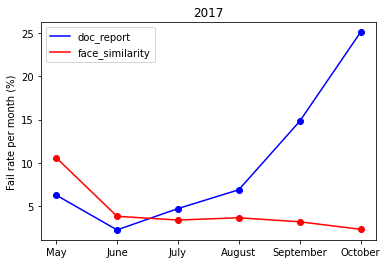

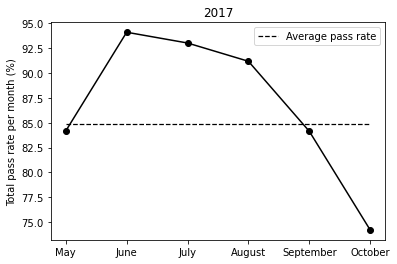

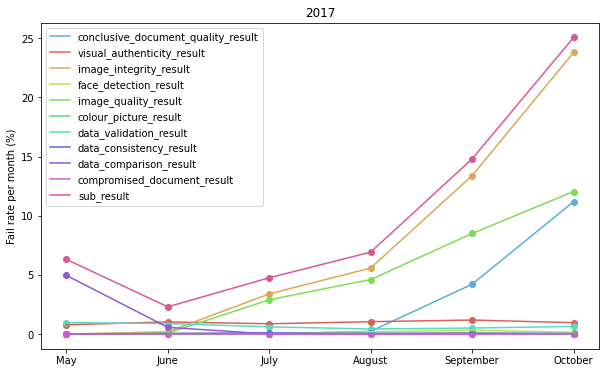

In [ ]:

doc_perc = {'May': [collections.Counter(doc_may['result'])['consider']*100/doc_may.shape[0]], 'June': [collections.Counter(doc_june['result'])['consider']*100/doc_june.shape[0]],
                 'July': [collections.Counter(doc_july['result'])['consider']*100/doc_july.shape[0]], 'August': [collections.Counter(doc_august['result'])['consider']*100/doc_august.shape[0]],
                 'September': [collections.Counter(doc_september['result'])['consider']*100/doc_september.shape[0]], 'October': [collections.Counter(doc_october['result'])['consider']*100/doc_october.shape[0]]}
doc_perc = pd.DataFrame(data=doc_perc)

face_perc = {'May': [collections.Counter(face_may['result'])['consider']*100/face_may.shape[0]], 'June': [collections.Counter(face_june['result'])['consider']*100/face_june.shape[0]],
                 'July': [collections.Counter(face_july['result'])['consider']*100/face_july.shape[0]], 'August': [collections.Counter(face_august['result'])['consider']*100/face_august.shape[0]],
                 'September': [collections.Counter(face_september['result'])['consider']*100/face_september.shape[0]], 'October': [collections.Counter(face_october['result'])['consider']*100/face_october.shape[0]]}
face_perc = pd.DataFrame(data=face_perc)

clear_doc_perc = {'May': [collections.Counter(doc_may['result'])['clear']*100/doc_may.shape[0]], 'June': [collections.Counter(doc_june['result'])['clear']*100/doc_june.shape[0]],
                 'July': [collections.Counter(doc_july['result'])['clear']*100/doc_july.shape[0]], 'August': [collections.Counter(doc_august['result'])['clear']*100/doc_august.shape[0]],
                 'September': [collections.Counter(doc_september['result'])['clear']*100/doc_september.shape[0]], 'October': [collections.Counter(doc_october['result'])['clear']*100/doc_october.shape[0]]}
clear_doc_perc = pd.DataFrame(data=clear_doc_perc)

clear_face_perc = {'May': [collections.Counter(face_may['result'])['clear']*100/face_may.shape[0]], 'June': [collections.Counter(face_june['result'])['clear']*100/face_june.shape[0]],
                 'July': [collections.Counter(face_july['result'])['clear']*100/face_july.shape[0]], 'August': [collections.Counter(face_august['result'])['clear']*100/face_august.shape[0]],
                 'September': [collections.Counter(face_september['result'])['clear']*100/face_september.shape[0]], 'October': [collections.Counter(face_october['result'])['clear']*100/face_october.shape[0]]}
clear_face_perc = pd.DataFrame(data=clear_face_perc)

total_clear = np.array([clear_may/doc_may.shape[0], clear_june/doc_june.shape[0], clear_july/doc_july.shape[0], clear_august/doc_august.shape[0], clear_september/doc_september.shape[0], clear_october/doc_october.shape[0] ])
total_perc_clear = total_clear*100


# print(doc_perc)
# print(face_perc)

months = ['May', 'June', 'July', 'August', 'September', 'October']

visual_authenticity_result_month = np.array([])
image_integrity_result_month = np.array([])
face_detection_result_month = np.array([])
image_quality_result_month = np.array([])
conclusive_document_quality_result_month = np.array([])
colour_picture_result_month = np.array([])
data_validation_result_month = np.array([])
data_consistency_result_month = np.array([])
data_comparison_result_month = np.array([])
compromised_document_result_month = np.array([])
sub_result_month = np.array([])


for each_month in months:
  visual_authenticity_result_month = np.hstack([visual_authenticity_result_month, collections.Counter((data_by_month[each_month][1])['visual_authenticity_result'])['consider']])
  image_integrity_result_month = np.hstack([image_integrity_result_month, collections.Counter((data_by_month[each_month][1])['image_integrity_result'])['consider']])
  face_detection_result_month = np.hstack([face_detection_result_month, collections.Counter((data_by_month[each_month][1])['face_detection_result'])['consider']])
  image_quality_result_month = np.hstack([image_quality_result_month, collections.Counter((data_by_month[each_month][1])['image_quality_result'])['unidentified']])
  conclusive_document_quality_result_month = np.hstack([conclusive_document_quality_result_month, collections.Counter((data_by_month[each_month][1])['conclusive_document_quality_result'])['consider']])
  colour_picture_result_month = np.hstack([colour_picture_result_month, collections.Counter((data_by_month[each_month][1])['colour_picture_result'])['consider']])
  data_validation_result_month = np.hstack([data_validation_result_month, collections.Counter((data_by_month[each_month][1])['data_validation_result'])['consider']])
  data_consistency_result_month = np.hstack([data_consistency_result_month, collections.Counter((data_by_month[each_month][1])['data_consistency_result'])['consider']])
  data_comparison_result_month = np.hstack([data_comparison_result_month, collections.Counter((data_by_month[each_month][1])['data_comparison_result'])['consider']])
  compromised_document_result_month = np.hstack([compromised_document_result_month, collections.Counter((data_by_month[each_month][1])['compromised_document_result'])['consider']])
  sub_result_month = np.hstack([sub_result_month, collections.Counter((data_by_month[each_month][1])['sub_result'])['caution'] + collections.Counter((data_by_month[each_month][1])['sub_result'])['rejected']+collections.Counter((data_by_month[each_month][1])['sub_result'])['suspected']])



## PLOTTING

months = ['May', 'June', 'July', 'August', 'September', 'October']

fails_month = np.array([data_by_month[elem][1].shape[0] for elem in months])

print()
print(fails_month)


fig, ax = plt.subplots()
ax.scatter(months, doc_perc.to_numpy(),  c='b')
ax.plot(months, doc_perc.to_numpy().flatten(), color='b', label='doc_report')
ax.scatter(months, face_perc.to_numpy(), c='r')
ax.plot(months, face_perc.to_numpy().flatten(), color='r', label='face_similarity')
# ax.set_xlabel('Smarts')
ax.set_ylabel('Fail rate per month (%)')
ax.set_title('2017')
ax.legend()


fig, ax = plt.subplots()
# ax.scatter(months, clear_doc_perc.to_numpy(),  c='b')
# ax.plot(months, clear_doc_perc.to_numpy().flatten(), color='b', label='doc_report')
# ax.scatter(months, clear_face_perc.to_numpy(), c='r')
# ax.plot(months, clear_face_perc.to_numpy().flatten(), color='r', label='face_similarity')
ax.scatter(months, total_perc_clear, c='k')
ax.plot(months, total_perc_clear, color='k')
ax.plot(months, np.ones(6)*pass_rate*100, 'k--', linewidth=1.25, label='Average pass rate')
# ax.set_xlabel('Smarts')
ax.set_ylabel('Total pass rate per month (%)')
ax.set_title('2017')
ax.legend()

fig, ax = plt.subplots(figsize=[10,6])

ax.scatter(months, (conclusive_document_quality_result_month/fails_month)*100, c=sns.color_palette("hls", 11)[6])
ax.plot(months, (conclusive_document_quality_result_month/fails_month)*100, color=sns.color_palette("hls", 11)[6], label='conclusive_document_quality_result')

ax.scatter(months, (visual_authenticity_result_month/fails_month)*100,  c=sns.color_palette("hls", 11)[0])
ax.plot(months, (visual_authenticity_result_month/fails_month)*100, color=sns.color_palette("hls", 11)[0], label='visual_authenticity_result')

ax.scatter(months, (image_integrity_result_month/fails_month)*100, c=sns.color_palette("hls", 11)[1])
ax.plot(months, (image_integrity_result_month/fails_month)*100, color=sns.color_palette("hls", 11)[1], label='image_integrity_result')

ax.scatter(months, (face_detection_result_month/fails_month)*100, c=sns.color_palette("hls", 11)[2])
ax.plot(months, (face_detection_result_month/fails_month)*100, color=sns.color_palette("hls", 11)[2], label='face_detection_result')

ax.scatter(months, (image_quality_result_month/fails_month)*100, c=sns.color_palette("hls", 11)[3])
ax.plot(months, (image_quality_result_month/fails_month)*100, color=sns.color_palette("hls", 11)[3], label='image_quality_result')

ax.scatter(months, (colour_picture_result_month/fails_month)*100, c=sns.color_palette("hls", 11)[4])
ax.plot(months, (colour_picture_result_month/fails_month)*100, color=sns.color_palette("hls", 11)[4], label='colour_picture_result')

ax.scatter(months, (data_validation_result_month/fails_month)*100, c=sns.color_palette("hls", 11)[5])
ax.plot(months, (data_validation_result_month/fails_month)*100, color=sns.color_palette("hls", 11)[5], label='data_validation_result')

ax.scatter(months, (data_consistency_result_month/fails_month)*100, c=sns.color_palette("hls", 11)[7])
ax.plot(months, (data_consistency_result_month /fails_month)*100, color=sns.color_palette("hls", 11)[7], label='data_consistency_result')

ax.scatter(months, (data_comparison_result_month /fails_month)*100, c=sns.color_palette("hls", 11)[8])
ax.plot(months, (data_comparison_result_month /fails_month)*100, color=sns.color_palette("hls", 11)[8], label='data_comparison_result')

ax.scatter(months, (compromised_document_result_month  /fails_month)*100, c=sns.color_palette("hls", 11)[9])
ax.plot(months, (compromised_document_result_month  /fails_month)*100, color=sns.color_palette("hls", 11)[9], label='compromised_document_result')

ax.scatter(months, (sub_result_month/fails_month)*100, c=sns.color_palette("hls", 11)[10])
ax.plot(months, (sub_result_month/fails_month)*100, color=sns.color_palette("hls", 11)[10], label='sub_result')

# ax.set_xlabel('Smarts')
ax.set_ylabel('Fail rate per month (%)')
ax.set_title('2017')
ax.legend()

